In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("../data/bitcoin_price.csv")

In [3]:
data.head()

,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
0,BTC,2020-01-01,7179.957819,7251.277888,7298.892042,7119.626946
1,BTC,2020-01-02,7174.744012,7179.957689,7237.014866,7152.992402
2,BTC,2020-01-03,6955.487580,7174.712357,7190.188749,6914.857474
3,BTC,2020-01-04,7291.219505,6955.487580,7390.041835,6852.093401
4,BTC,2020-01-05,7337.636670,7291.217504,7390.762935,7263.178696


In [4]:
data["Date"] = pd.to_datetime(data["Date"])

In [5]:
train = data[data["Date"] < "2021-01-01"]
test = data[data["Date"] >= "2021-01-01"]

## Grid Search

In [6]:
ts = train["Closing Price (USD)"]

In [7]:
def simple_moving_average(window_size):
    predicted = [np.nan,] + ts.rolling(window_size).mean().tolist()[:-1]
    actual = [np.nan] * window_size + ts.copy()[window_size:].tolist()
    rmse = mean_squared_error(actual[window_size:], predicted[window_size:], squared = False)
    return rmse

In [8]:
# window_size grid search
sizes = range(1,21)
errors = []
for size in sizes:
    errors.append(simple_moving_average(size))

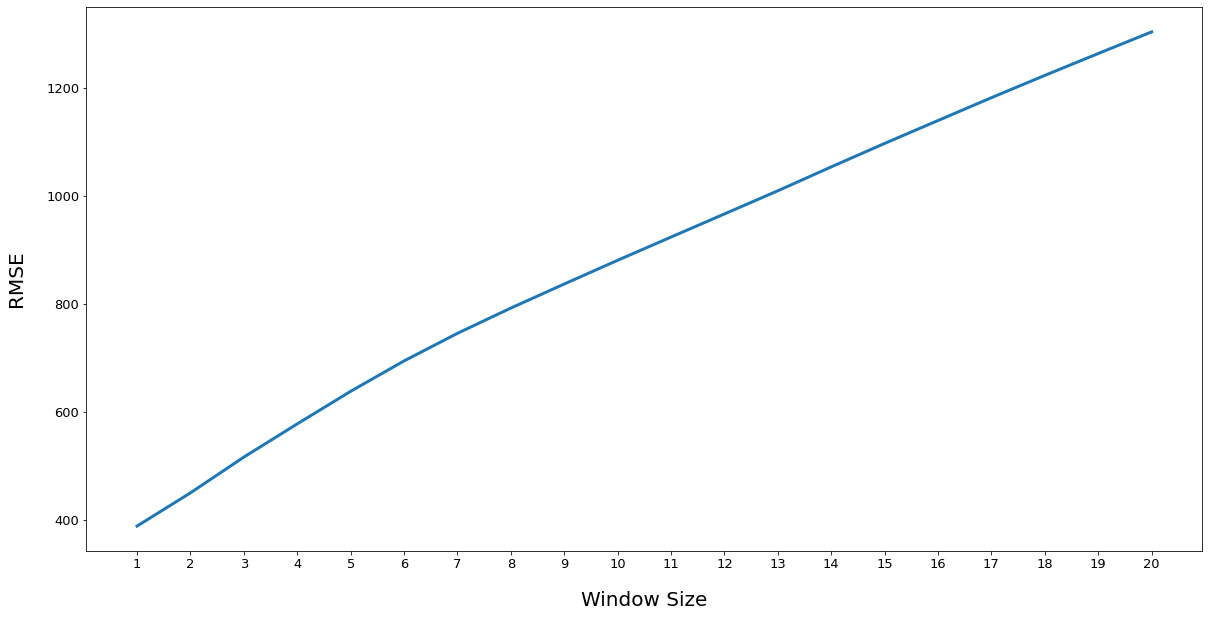

In [9]:
plt.figure(figsize=(20,10)) 
plt.plot(sizes, errors, lw = 3)
plt.xticks(sizes, size = 13)
plt.yticks(size = 13)
plt.ylabel("RMSE", size = 20, labelpad = 20)
plt.xlabel("Window Size", size = 20, labelpad = 20)
plt.show()

## Prediction

In [10]:
test["regression"] = [np.nan,] + test["Closing Price (USD)"].rolling(2).mean().tolist()[:-1]

In [11]:
test["close_lag"] = test["Closing Price (USD)"].shift(periods = 1)
test["classification"] = test["regression"] - test["close_lag"]
test["classification"] = test["classification"].apply(lambda x : 1 if x > 0 else -1)

In [12]:
test.head()

,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD),regression,close_lag,classification
366,BTC,2021-01-01,29111.521567,28872.829775,29280.045328,27916.625059,NaN,NaN,-1
367,BTC,2021-01-02,29333.605121,28935.810981,29601.594898,28753.412314,NaN,29111.521567,-1
368,BTC,2021-01-03,32154.167363,29353.640608,33064.673534,29012.927887,29222.563344,29333.605121,-1
369,BTC,2021-01-04,33002.536427,32074.106611,34452.080337,31885.581619,30743.886242,32154.167363,-1
370,BTC,2021-01-05,31431.612280,32788.583453,33358.399346,28154.110298,32578.351895,33002.536427,-1


In [13]:
test = test.dropna()
regression_pred = test.regression.tolist()
classification_pred = test.classification.tolist()
date = test.Date.tolist()